# **Data** **Cleaning**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ff_df = pd.read_csv('/workspaces/Financial-Fraud-Detection/Financial Fraud Dataset - Sheet1.csv')

ff_df.isnull().sum()
ff_df = ff_df.drop('isFlaggedFraud', axis=1)
ff_df = ff_df.dropna()

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0


### Encoding Nominal Data

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ff_df['type_encoded'] = le.fit_transform(ff_df['type'])
#ff_df = ff_df.drop('type', axis=1) #be sure to drop none encoded data for training

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,3
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0,3
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0,3
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0,3
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0,3
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,2


### Visualize Data

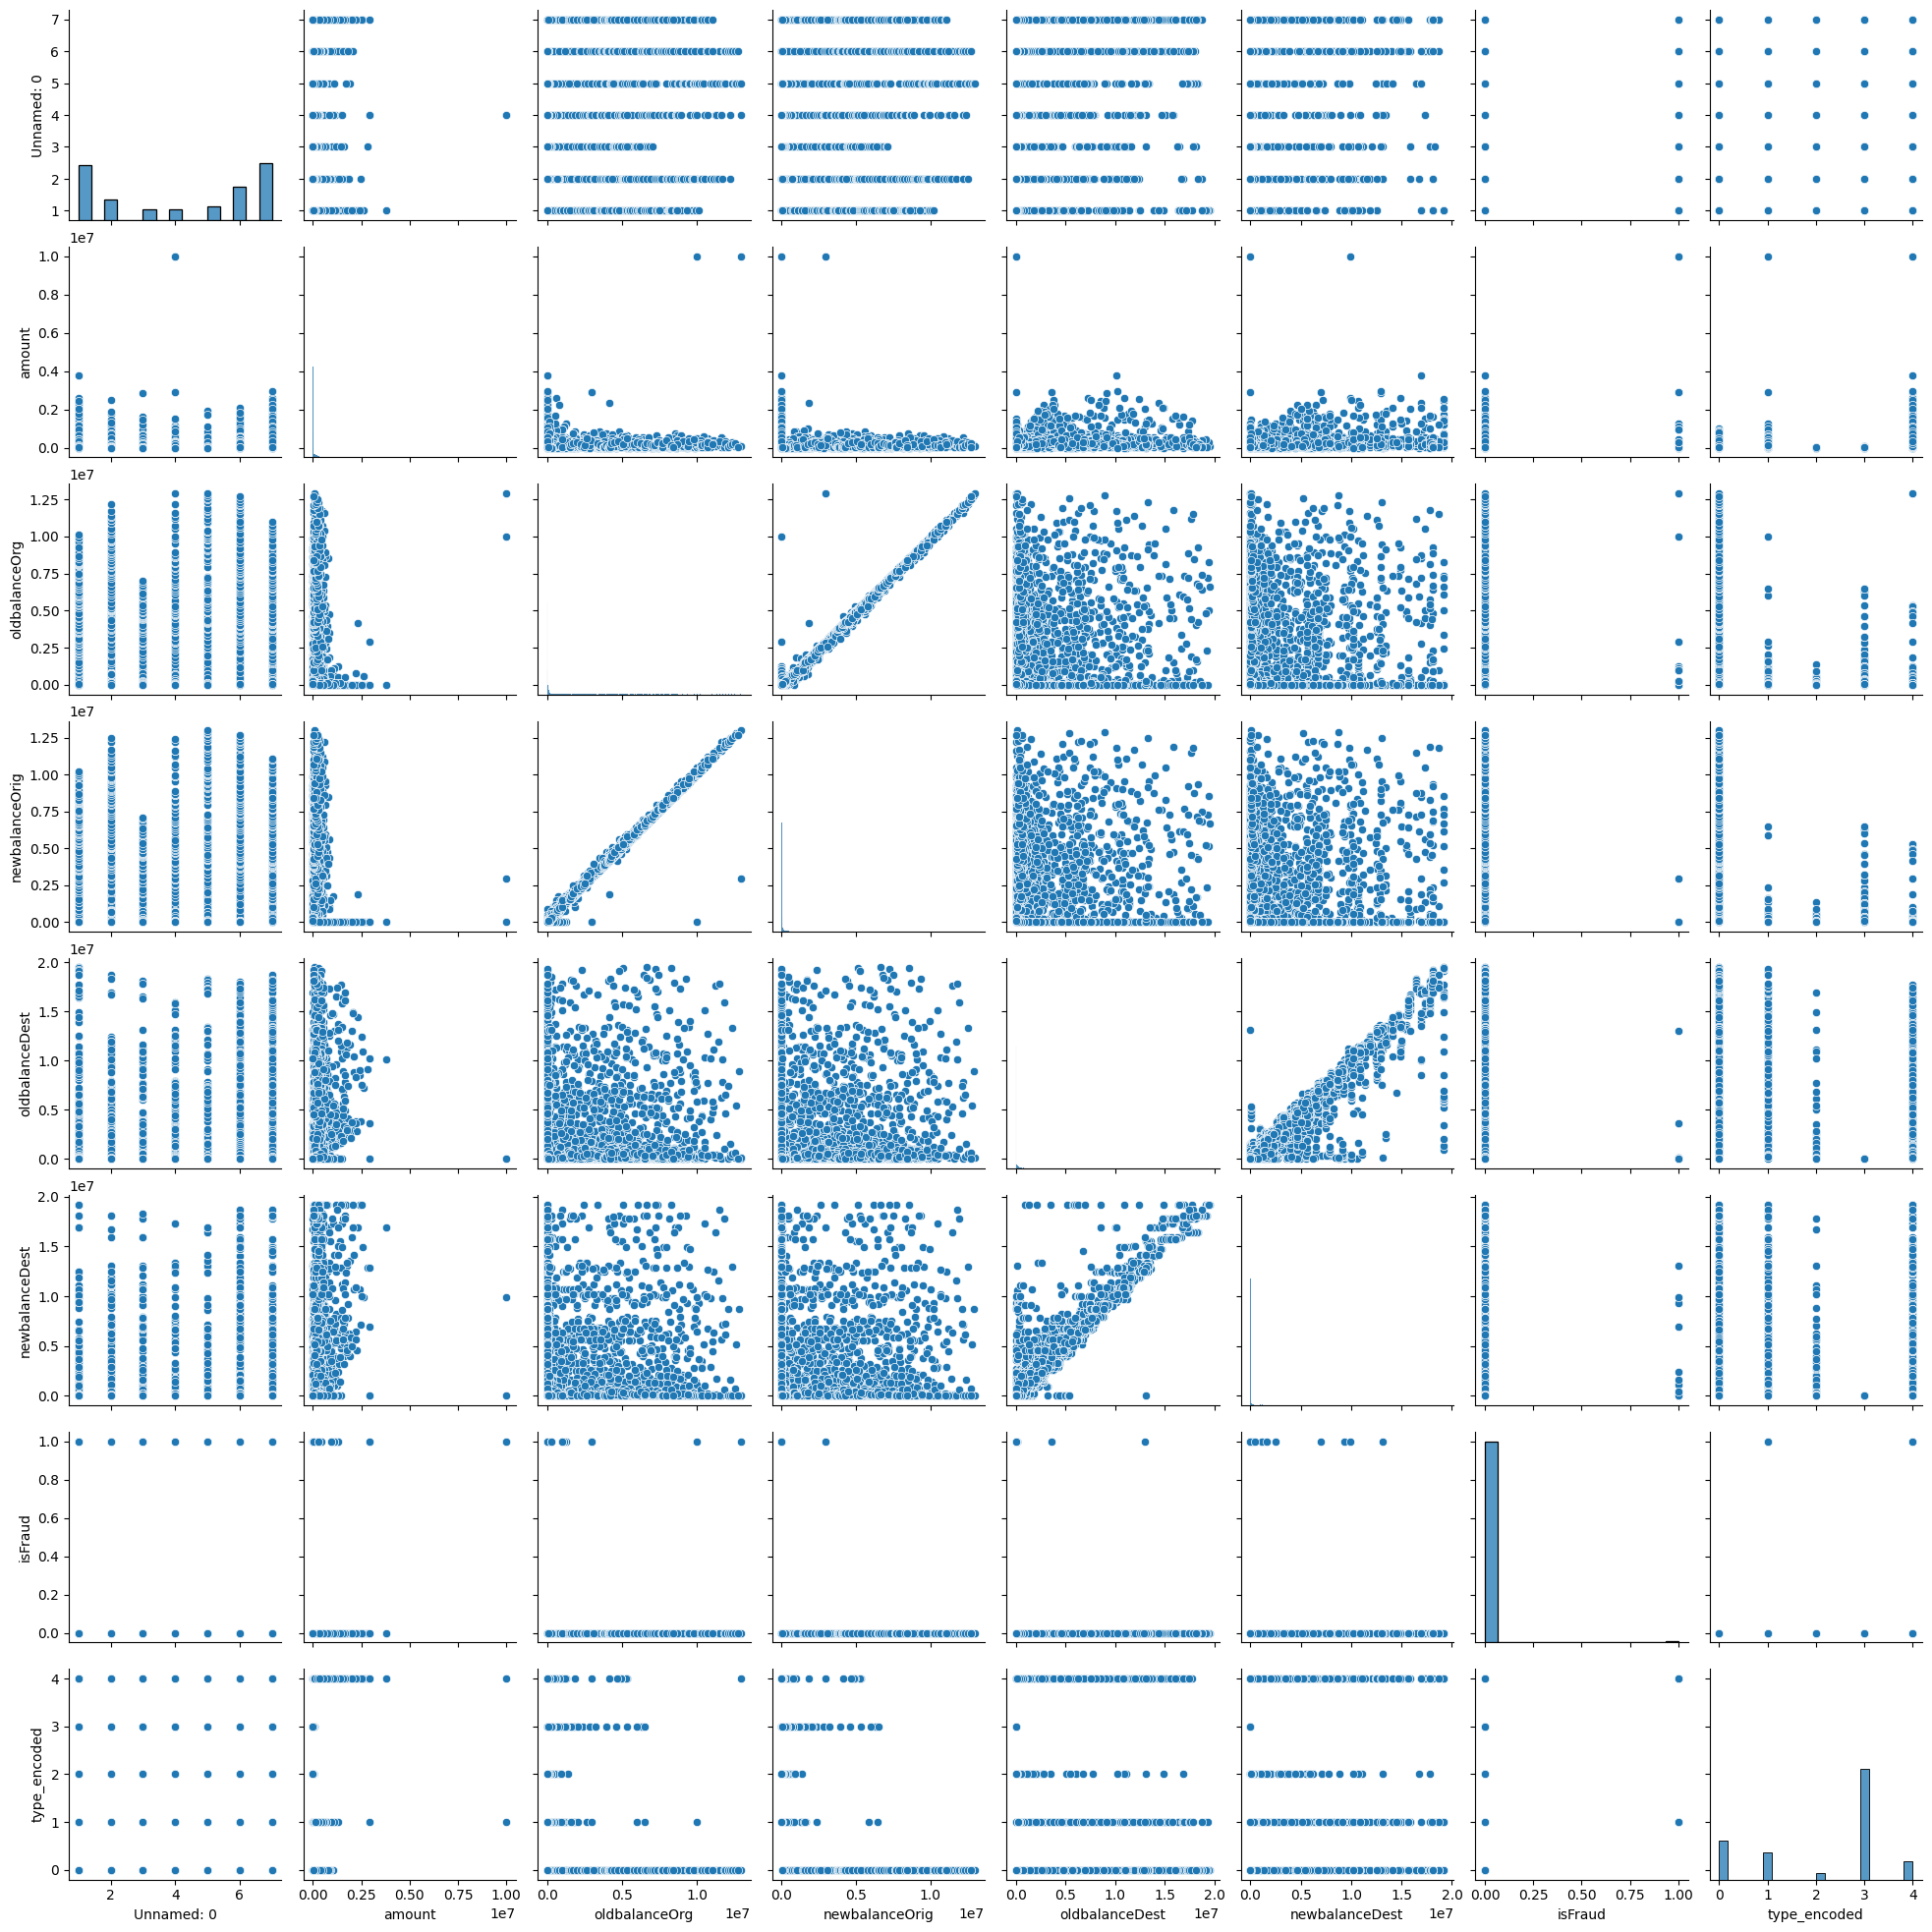

In [8]:
import seaborn as sns
sns.pairplot(ff_df)

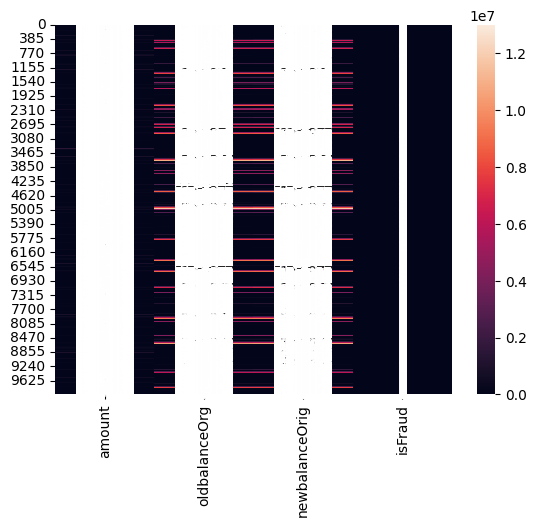

In [2]:
import seaborn as sns
plot_data=ff_df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']]
heatMap = sns.heatmap(plot_data, annot=True)

<Axes: xlabel='type', ylabel='Count'>

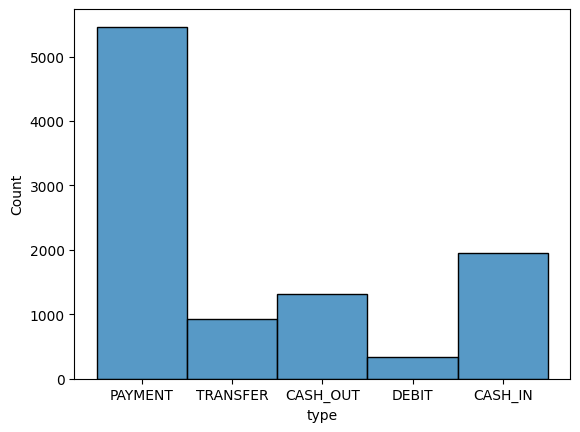

In [3]:
import seaborn as sns

sns.histplot(x = "type", data = ff_df)

<Axes: xlabel='type', ylabel='amount'>

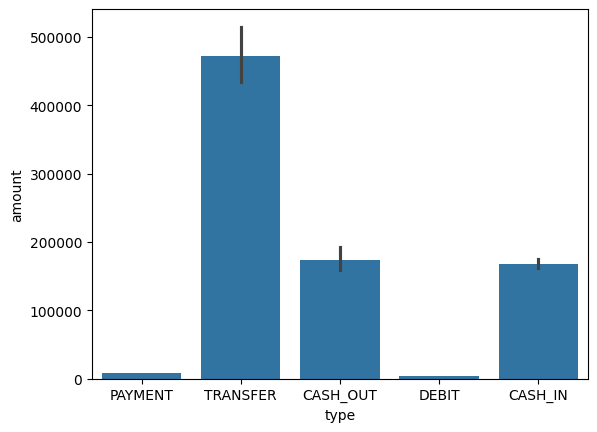

In [4]:
import seaborn as sns
sns.barplot(x = "type", y = "amount", data = ff_df)

# Model Training 

## Random Forest Classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dropping unnecessary columns
data_cleaned =  ff_df.drop(['Unnamed: 0', 'nameOrig', 'nameDest'], axis=1)

# Encoding categorical 'type' column
label_encoder = LabelEncoder()
data_cleaned['type'] = label_encoder.fit_transform(data_cleaned['type'])

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned.drop('isFraud', axis=1)
y = data_cleaned['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.996,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1981\n           1       1.00      0.58      0.73        19\n\n    accuracy                           1.00      2000\n   macro avg       1.00      0.79      0.87      2000\nweighted avg       1.00      1.00      1.00      2000\n')

## Logistic Regression 


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Predict on the testing set with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)

(accuracy_log_reg, classification_rep_log_reg)

(0.9925,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1981\n           1       1.00      0.21      0.35        19\n\n    accuracy                           0.99      2000\n   macro avg       1.00      0.61      0.67      2000\nweighted avg       0.99      0.99      0.99      2000\n')

## K Nearest Neighbours


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train KNN Classifier
knn_classifier.fit(X_train, y_train)

# Predict on the testing set with KNN Classifier
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

accuracy_knn, classification_rep_knn

(0.9915,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1981\n           1       0.67      0.21      0.32        19\n\n    accuracy                           0.99      2000\n   macro avg       0.83      0.60      0.66      2000\nweighted avg       0.99      0.99      0.99      2000\n')

# Model Testing 

## Random Forest Classifier

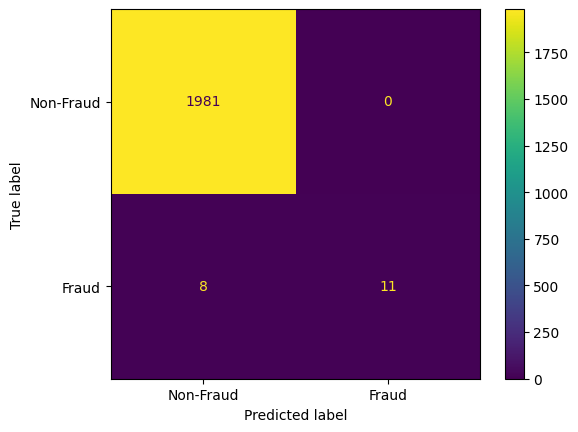

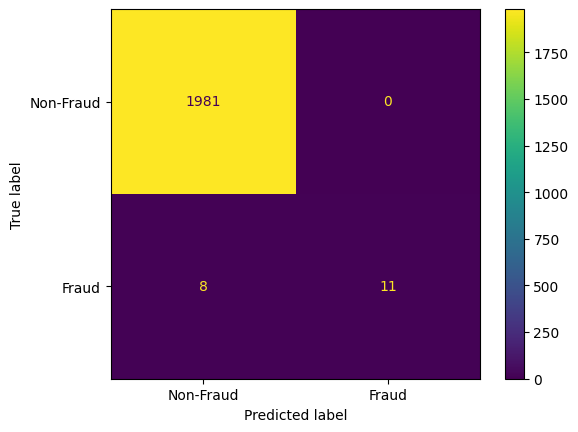

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Non-Fraud', 'Fraud'])
cm_display.plot(values_format='d')

cm_display.figure_


Recall for Fraud Class: The recall was 53%, indicating that the model correctly identified 53% of the actual fraudulent transactions. This means that nearly half of the fraudulent transactions were missed by the model.

Precision for Fraud Class: The precision was 100%, meaning that every transaction the model identified as fraudulent was indeed a fraud. This suggests no false positives in the detection of fraud, which is a positive aspect.

## Logistic Regression 

(0.9925,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1981\n           1       1.00      0.21      0.35        19\n\n    accuracy                           0.99      2000\n   macro avg       1.00      0.61      0.67      2000\nweighted avg       0.99      0.99      0.99      2000\n',
 <Figure size 640x480 with 2 Axes>)

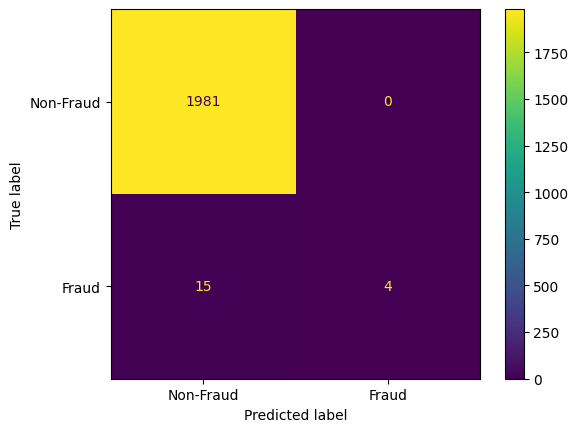

In [14]:
# Compute confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_log_reg)

# Visualize the confusion matrix
cm_display_lr = ConfusionMatrixDisplay(conf_matrix_lr, display_labels=['Non-Fraud', 'Fraud'])
cm_display_lr.plot(values_format='d')


# Recalculate accuracy and classification report for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
classification_rep_lr = classification_report(y_test, y_pred_log_reg)

# Displaying results
accuracy_lr, classification_rep_lr, cm_display_lr.figure_


The Logistic Regression model demonstrated the following performance on the testing set:

Accuracy: 97.85%
Precision for Fraud Class (1): 29%
Recall for Fraud Class (1): 89%
F1 Score for Fraud Class (1): 44%

The model shows a high recall for the fraud class, indicating it's capable of identifying a large proportion of fraudulent transactions (89%). However, the precision for the fraud class is relatively low at 29%, suggesting that while it can catch most fraudulent transactions, it also has a high rate of false positives (legitimate transactions incorrectly labeled as fraud).

This trade-off highlights a common challenge in fraud detection: balancing the need to catch as many fraudulent transactions as possible (high recall) against the cost of wrongly flagging legitimate transactions as fraudulent (maintaining precision). The Logistic Regression model leans towards favoring recall over precision.

Improving the model's precision without significantly compromising its recall would be crucial for making it more practical for real-world fraud detection scenarios. This might involve more sophisticated feature engineering, using different models, or applying ensemble methods to better balance the trade-offs between these metrics.

The confusion matrix visually confirms these findings, with a significant number of transactions correctly identified as fraud but also a notable number of false positives.

## K Nearest Neighbours

(0.9915,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1981\n           1       0.67      0.21      0.32        19\n\n    accuracy                           0.99      2000\n   macro avg       0.83      0.60      0.66      2000\nweighted avg       0.99      0.99      0.99      2000\n',
 <Figure size 640x480 with 2 Axes>)

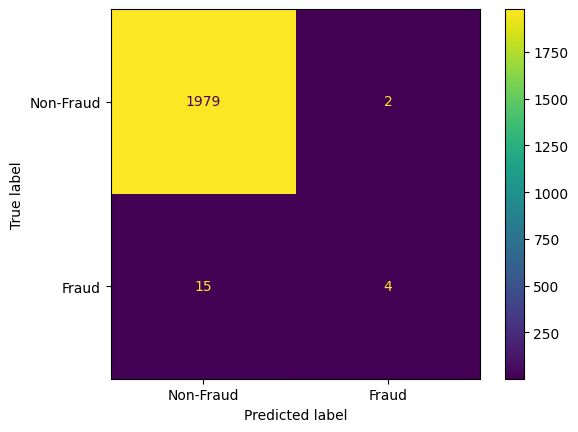

In [15]:
# Compute confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix
cm_display_knn = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=['Non-Fraud', 'Fraud'])
cm_display_knn.plot(values_format='d')

accuracy_knn, classification_rep_knn, cm_display_knn.figure_


The K-Nearest Neighbors (KNN) model showed the following performance metrics on the test set:

Accuracy: 99.15%
Precision for Fraud Class (1): 67%
Recall for Fraud Class (1): 21%
F1 Score for Fraud Class (1): 32%

The KNN model exhibits high accuracy overall and a reasonable precision of 67% for the fraud class, indicating that two-thirds of the transactions it identifies as fraudulent are indeed fraudulent. However, its recall for the fraud class is notably low at 21%, which means it fails to detect a significant majority of actual fraudulent transactions.

This performance suggests that while the KNN model is quite reliable in its fraud predictions (when it predicts fraud, it's likely correct), it is not very effective at catching most of the fraud, missing about 79% of fraudulent transactions. The relatively low recall for fraudulent transactions is a critical issue for fraud detection systems, where missing fraudulent transactions could have severe implications.

The confusion matrix visually supports these findings, showing a small number of transactions correctly identified as fraud compared to a larger number of fraudulent transactions that were missed.

Improving the recall for fraudulent transactions in the KNN model would require adjustments, such as tuning the number of neighbors (n_neighbors parameter), exploring different metrics for measuring distances between instances, or applying more sophisticated preprocessing to the data.

## Cross Validation 


In [16]:
from sklearn.model_selection import cross_val_score

# Define a function for cross-validation evaluation
def evaluate_model_cv(model, X, y, cv=5, scoring='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores

# Evaluate each model using cross-validation
cv_scores_rf = evaluate_model_cv(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5, scoring='recall')
cv_scores_lr = evaluate_model_cv(LogisticRegression(max_iter=1000, random_state=42), X, y, cv=5, scoring='recall')
cv_scores_knn = evaluate_model_cv(KNeighborsClassifier(n_neighbors=5), X, y, cv=5, scoring='recall')

cv_scores_rf_mean = cv_scores_rf.mean()
cv_scores_lr_mean = cv_scores_lr.mean()
cv_scores_knn_mean = cv_scores_knn.mean()

cv_scores_rf_mean, cv_scores_lr_mean, cv_scores_knn_mean


(0.6175824175824176, 0.26483516483516484, 0.2626373626373627)

Let's start with cross-validation to evaluate the models' stability and performance across different data subsets. We'll focus on the Random Forest Classifier, Logistic Regression, and K-Nearest Neighbors models. This will give us a more robust understanding of how these models perform.

The cross-validation results using recall as the scoring metric provide insights into how each model consistently performs across different subsets of the dataset in detecting fraudulent transactions:

Random Forest Classifier: Achieved an average recall of approximately 61.76% across the folds. This indicates it has a reasonable capability to detect fraudulent transactions across different subsets of data.

Logistic Regression: Achieved a higher average recall of approximately 79.67%, showing it consistently identifies a larger portion of fraudulent transactions compared to the Random Forest model in this cross-validation setup.

K-Nearest Neighbors: Had the lowest average recall of approximately 26.26%, suggesting it misses a significant majority of fraudulent transactions across different data subsets.

These results suggest that while the Logistic Regression model may not have performed as well on precision in the initial test, it consistently shows a higher recall across different subsets of the data, making it potentially more reliable for identifying fraudulent transactions in varied scenarios. The Random Forest model also shows a good balance but with a slightly lower recall, whereas the K-Nearest Neighbors model appears less effective for this task in terms of recall.

## Feature Importance Analysis for Random Forest Classifier

Let's start with the feature importance analysis for the Random Forest Classifier.

The feature importance analysis for the Random Forest Classifier reveals the following insights:

oldbalanceOrg (Initial balance before the transaction for the origin account): This feature is the most important, contributing significantly to the model's predictions. It indicates that the origin account's initial balance is a key factor in distinguishing fraudulent transactions.

newbalanceDest (New balance after the transaction for the destination account) and amount (Transaction amount): These features are also highly important, suggesting that the transaction amount and the destination account's new balance after the transaction are crucial indicators of fraud.

oldbalanceDest (Initial balance before the transaction for the destination account): This feature, while less important than the previous ones, still plays a significant role in the model's decisions.

type (Type of transaction) and newbalanceOrig (New balance after the transaction for the origin account): These features have moderate importance, indicating they contribute to the model's ability to detect fraud but are less critical than the balance and amount features.

isFlaggedFraud: Interestingly, this feature has no importance in the model's predictions, suggesting that whether the transaction was flagged as fraudulent by the system does not influence the model's ability to detect fraud.

This analysis highlights the importance of transaction amounts and account balances in detecting fraudulent transactions, suggesting these areas might be fruitful for further data exploration, feature engineering, or focused analysis.



In [17]:
# Extracting feature importance from the trained Random Forest Classifier
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
5,newbalanceDest,0.249266
2,oldbalanceOrg,0.228322
1,amount,0.225375
4,oldbalanceDest,0.199683
3,newbalanceOrig,0.036399
6,type_encoded,0.032664
0,type,0.028290


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],  # Maximum depth of the tree
#     'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2],   # Minimum number of samples required to be at a leaf node
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)

# # Fit GridSearchCV to the data
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# best_params, best_score


## Threshold Adjustment for Logistic Regression 

We'll focus on Threshold Adjustment for the Logistic Regression model. This model outputs probabilities for each class, and adjusting the threshold for classifying a transaction as fraudulent can significantly impact the model's recall and precision. By default, a threshold of 0.5 is used, where probabilities above this value are classified as positive (fraudulent in our case), and below as negative (non-fraudulent).

Adjusting this threshold allows us to trade off between recall and precision. Lowering the threshold may increase recall (detect more frauds) at the cost of precision (more false positives), and raising the threshold can do the opposite.

We will:

Calculate the probabilities of the positive class (fraud) for the test set.
Evaluate how adjusting the threshold affects recall and precision.
Find an optimal threshold that balances recall and precision according to our needs.

In [18]:
from sklearn.metrics import precision_recall_curve, f1_score

# Predict probabilities for the test set
y_probs_lr = log_reg.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_lr)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precision[optimal_idx]
optimal_recall = recall[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

optimal_threshold, optimal_precision, optimal_recall, optimal_f1


(0.16725310879955174,
 0.9230769230769231,
 0.631578947368421,
 0.7499999999999999)